# Embedding

In [1]:
import pandas as pd

splits = {'train': 'IMDB_train.csv', 'validation': 'IMDB_validation.csv', 'test': 'IMDB_test.csv'}
df = pd.read_csv("hf://datasets/jahjinx/IMDb_movie_reviews/" + splits["train"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36000 non-null  object
 1   label   36000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 562.6+ KB


,text,label
0,"Beautifully photographed and ably acted, gener...",0
1,"Well, where to start describing this celluloid...",0
2,I first caught the movie on its first run on H...,1
3,I love Umberto Lenzi's cop movies -- ROME ARME...,0
4,I generally won't review movies I haven't seen...,0


In [ ]:
# Text lowering
# Special character removing
# White space
# Stop word removing
# Lemmatiazation

In [3]:
# prompt: Write a code what do the text lowering on the text column in df dataframe

df['text'] = df['text'].str.lower()
df.head()

,text,label
0,"beautifully photographed and ably acted, gener...",0
1,"well, where to start describing this celluloid...",0
2,i first caught the movie on its first run on h...,1
3,i love umberto lenzi's cop movies -- rome arme...,0
4,i generally won't review movies i haven't seen...,0


In [4]:
# prompt: Write a code what remove the special character on the text column in df dataframe

import re

df['text'] = df['text'].apply(lambda text: re.sub(r'[^a-zA-Z0-9\s]', '', text))
df.head()

,text,label
0,beautifully photographed and ably acted genera...,0
1,well where to start describing this celluloid ...,0
2,i first caught the movie on its first run on h...,1
3,i love umberto lenzis cop movies rome armed t...,0
4,i generally wont review movies i havent seen i...,0


In [5]:
# prompt: Write a code what remove the white space on the text column in df dataframe

df['text'] = df['text'].apply(lambda text: text.strip())
df.head()

,text,label
0,beautifully photographed and ably acted genera...,0
1,well where to start describing this celluloid ...,0
2,i first caught the movie on its first run on h...,1
3,i love umberto lenzis cop movies rome armed t...,0
4,i generally wont review movies i havent seen i...,0


In [6]:
# prompt: Write a code what remove the stop word and lemmatize  on the text column in df dataframe.
# Please use proress bar in the code and use the tqdm library to this.

!pip install nltk tqdm

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  tokens = text.split()
  tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
  return ' '.join(tokens)


df['text'] = [preprocess_text(text) for text in tqdm(df['text'])]
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
100%|██████████| 36000/36000 [00:25<00:00, 1405.45it/s]


,text,label
0,beautifully photographed ably acted generally ...,0
1,well start describing celluloid debacle alread...,0
2,first caught movie first run hbo probably 1981...,1
3,love umberto lenzis cop movie rome armed teeth...,0
4,generally wont review movie havent seen awhile...,0


## Validation

In [7]:
# prompt: Create me a unit test which validate the special character removing on the text column in the dataframe.

import unittest

class TestDataFrame(unittest.TestCase):

    def test_special_character_removal(self):
        # Create a sample dataframe with text containing special characters
        df = pd.DataFrame({'text': ['This is a test with @#$%^& special characters.']})

        # Apply the special character removal function
        df['text'] = df['text'].apply(lambda text: re.sub(r'[^a-zA-Z0-9\s]', '', text))

        # Assert that the special characters are removed
        self.assertEqual(df['text'].iloc[0], 'This is a test with  special characters')

# Run the tests
unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


## Embedding with GLoVe

In [ ]:
!pip install gensim

from gensim.models import KeyedVectors
import numpy as np

# Download pre-trained GloVe embeddings (you can choose a different size)
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

In [10]:
# Load the GloVe embeddings
glove_file = 'glove.6B.50d.txt'  # Choose the embedding size you want
word_vectors = {}  # Initialize an empty dictionary for word vectors

with open(glove_file, 'r', encoding='utf-8') as f:
    for line in tqdm(f):
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        word_vectors[word] = vector

400000it [00:06, 57382.90it/s]


In [11]:
def embed_text(text):
  """Embeds a text using GloVe embeddings."""
  tokens = text.split()
  embeddings = []
  for token in tokens:
    if token in word_vectors:
      embeddings.append(word_vectors[token])
  if not embeddings:
    return np.zeros(100)  # Return a zero vector if no words are found in the vocabulary
  return np.mean(embeddings, axis=0)

# Apply the embedding function to the 'text' column
df['embedding'] = df['text'].apply(embed_text)

In [13]:
df["text"].values[0]

'beautifully photographed ably acted generally writing slipshod scene unbelievability joy watching fact young lover twin brother instance contrived groaned loud emotionlight bulb connection seems gimmicky toobr br dont know though glass wine feel like relaxing something pretty look flaccid comedic scene pretty good movie major effort part viewer required italian film especially italian comedy usually much much better'

In [14]:
df["embedding"].values[0]

array([ 2.68272877e-01, -5.01866511e-04, -3.16697419e-01, -3.40818226e-01,
        2.82420129e-01,  1.46809235e-01, -2.12131992e-01, -7.49632940e-02,
       -2.89192468e-01,  3.94618273e-01, -1.15900725e-01,  2.18818352e-01,
       -1.66012272e-01,  2.07124412e-01,  4.11949754e-01, -2.16277651e-02,
        1.01727650e-01,  2.15855047e-01, -1.12091586e-01, -5.28184295e-01,
       -3.48698981e-02,  3.78844738e-01,  8.95959437e-02,  2.12653130e-01,
        4.61793512e-01, -1.04022682e+00, -6.45228207e-01,  3.38800907e-01,
        4.01436687e-01, -2.08937556e-01,  2.17517829e+00,  1.18549652e-01,
        1.61378831e-01, -3.57864529e-01, -4.27194424e-02,  1.54297844e-01,
       -2.17729639e-02,  2.29321882e-01, -2.30759487e-01, -2.81694084e-01,
       -5.22987396e-02,  2.59759426e-01, -5.26843257e-02,  1.37072772e-01,
        2.63979193e-02, -2.49618590e-02, -8.70732008e-04, -2.27133572e-01,
       -4.85526957e-02,  2.81658441e-01], dtype=float32)

## Embedding with word 2 vec

In [15]:
# prompt: Generate a simple python code which embedd the words from the text column of the df dataframe and uses the gensim library and Word2Vec model embedding for this.

from gensim.models import Word2Vec

# Tokenize the text data
sentences = [text.split() for text in df['text']]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def embed_text_word2vec(text):
  """Embeds a text using Word2Vec embeddings."""
  tokens = text.split()
  embeddings = []
  for token in tokens:
    if token in model.wv:
      embeddings.append(model.wv[token])
  if not embeddings:
    return np.zeros(100)  # Return a zero vector if no words are found in the vocabulary
  return np.mean(embeddings, axis=0)

# Apply the embedding function to the 'text' column
df['embedding_word2vec'] = df['text'].apply(embed_text_word2vec)

print(df["embedding_word2vec"].values[0])


[ 0.0212094   0.29069316 -0.54156506  0.07044213  0.43921798 -0.73421544
  0.13901082  0.99801815  0.22114949 -0.49835923  0.41774905 -0.15299574
 -0.04608146  0.5369597  -0.01479525 -0.31106523  0.31609717 -0.6014979
  0.0553988  -0.36662102  0.1434528  -0.2748841   0.45311156  0.10017263
  0.05938967  0.01584723 -0.5038178  -0.10624364  0.15745847  0.0842002
  0.8203035  -0.09507444  0.02243941 -0.67414325 -0.35479233  0.29070607
  0.03172866 -0.09364016 -0.17509444 -0.20643951  0.62923867 -0.6732525
  0.28549597 -0.45881307  0.572938    0.3617866  -0.33975548 -0.44460434
  0.43303582 -0.15745956  0.33293647 -0.59588176 -0.46921852 -0.32203108
  0.10345893 -0.37621912  0.05153088 -0.76784223 -0.1457484  -0.3619853
 -0.3741459  -0.5341101   0.18193865  0.13969125 -0.13156551  0.51585555
  0.59603465  0.512186   -0.85553813  0.8278269   0.4155972   0.05426178
 -0.30842268  0.49562845  0.43751195 -0.29496133  0.376341    0.18091725
 -0.15086843  0.06969143 -1.1528218   0.12900765 -0.694

In [16]:
df.head()

,text,label,embedding,embedding_word2vec
0,beautifully photographed ably acted generally ...,0,"[0.26827288, -0.0005018665, -0.31669742, -0.34...","[0.021209398, 0.29069316, -0.54156506, 0.07044..."
1,well start describing celluloid debacle alread...,0,"[0.04697367, 0.16670237, -0.04441131, -0.25150...","[-0.10529043, 0.22781177, -0.6105145, 0.050713..."
2,first caught movie first run hbo probably 1981...,1,"[0.007032901, 0.111045934, 0.035720818, -0.204...","[-0.28791052, 0.134661, -0.28207648, 0.0870275..."
3,love umberto lenzis cop movie rome armed teeth...,0,"[0.21531683, -0.07558888, -0.15434542, -0.2445...","[-0.024804141, 0.35360605, -0.54025227, 0.2557..."
4,generally wont review movie havent seen awhile...,0,"[0.14250396, 0.029842509, -0.031387947, -0.254...","[-0.20588896, 0.093072124, -0.27941442, 0.2808..."


# Dimension reduction

## PCA

In [17]:
# prompt: Generate a code which reduce the vectors of the embedding columns on the 2D dimension in the df dataframe. Ust PCA.

from sklearn.decomposition import PCA

# Assuming 'embedding' and 'embedding_word2vec' are your embedding columns
embedding_columns = ['embedding', 'embedding_word2vec']

for column in embedding_columns:
  # Extract the embeddings as a numpy array
  embeddings = np.vstack(df[column].values)

  # Initialize PCA with 2 components
  pca = PCA(n_components=2)

  # Fit and transform the embeddings
  reduced_embeddings = pca.fit_transform(embeddings)

  # Add the reduced embeddings as new columns to the DataFrame
  df[f'{column}_pca_x'] = reduced_embeddings[:, 0]
  df[f'{column}_pca_y'] = reduced_embeddings[:, 1]

df.head()

,text,label,embedding,embedding_word2vec,embedding_pca_x,embedding_pca_y,embedding_word2vec_pca_x,embedding_word2vec_pca_y
0,beautifully photographed ably acted generally ...,0,"[0.26827288, -0.0005018665, -0.31669742, -0.34...","[0.021209398, 0.29069316, -0.54156506, 0.07044...",0.058583,-0.330536,0.120720,-0.765447
1,well start describing celluloid debacle alread...,0,"[0.04697367, 0.16670237, -0.04441131, -0.25150...","[-0.10529043, 0.22781177, -0.6105145, 0.050713...",0.222503,-0.305355,0.818257,0.602587
2,first caught movie first run hbo probably 1981...,1,"[0.007032901, 0.111045934, 0.035720818, -0.204...","[-0.28791052, 0.134661, -0.28207648, 0.0870275...",-0.074386,-0.101204,0.202361,0.089796
3,love umberto lenzis cop movie rome armed teeth...,0,"[0.21531683, -0.07558888, -0.15434542, -0.2445...","[-0.024804141, 0.35360605, -0.54025227, 0.2557...",-0.206125,-0.140287,-0.278435,0.128288
4,generally wont review movie havent seen awhile...,0,"[0.14250396, 0.029842509, -0.031387947, -0.254...","[-0.20588896, 0.093072124, -0.27941442, 0.2808...",0.124784,-0.287439,1.305478,0.067713


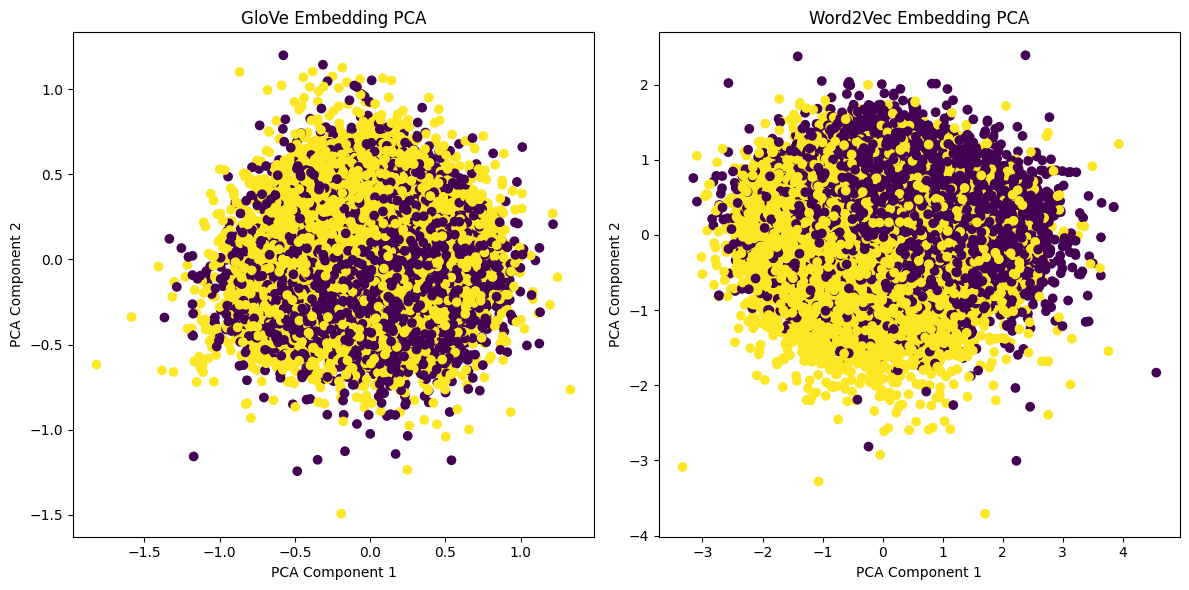

In [18]:
# prompt: Create a plot visualization from the PCA choordinates in the df dataframe.

import matplotlib.pyplot as plt

# Create a scatter plot for each embedding type
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['embedding_pca_x'], df['embedding_pca_y'], c=df['label'], cmap='viridis')
plt.title('GloVe Embedding PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 2, 2)
plt.scatter(df['embedding_word2vec_pca_x'], df['embedding_word2vec_pca_y'], c=df['label'], cmap='viridis')
plt.title('Word2Vec Embedding PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


## UMAP

In [19]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


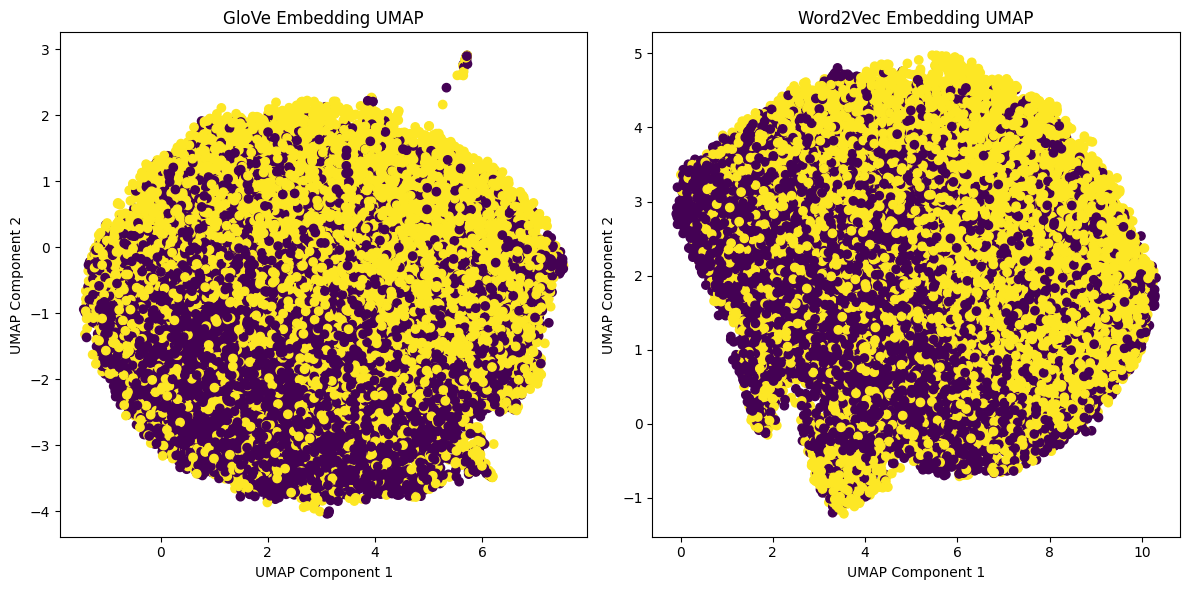

In [20]:
# prompt: Generate a code which reduce the vectors of the embedding columns on the 2D dimension in the df dataframe. Ust UMAP.

import umap

# Assuming 'embedding' and 'embedding_word2vec' are your embedding columns
embedding_columns = ['embedding', 'embedding_word2vec']

for column in embedding_columns:
  # Extract the embeddings as a numpy array
  embeddings = np.vstack(df[column].values)

  # Initialize UMAP with 2 components
  reducer = umap.UMAP(n_components=2, random_state=42)

  # Fit and transform the embeddings
  reduced_embeddings = reducer.fit_transform(embeddings)

  # Add the reduced embeddings as new columns to the DataFrame
  df[f'{column}_umap_x'] = reduced_embeddings[:, 0]
  df[f'{column}_umap_y'] = reduced_embeddings[:, 1]

df.head()

# Create a scatter plot for each embedding type
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['embedding_umap_x'], df['embedding_umap_y'], c=df['label'], cmap='viridis')
plt.title('GloVe Embedding UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

plt.subplot(1, 2, 2)
plt.scatter(df['embedding_word2vec_umap_x'], df['embedding_word2vec_umap_y'], c=df['label'], cmap='viridis')
plt.title('Word2Vec Embedding UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

plt.tight_layout()
plt.show()


In [21]:
# prompt: Generate a code which reduce the vectors of the embedding columns on the 2D dimension in the df dataframe. Ust TSNE.

from sklearn.manifold import TSNE

# Assuming 'embedding' and 'embedding_word2vec' are your embedding columns
embedding_columns = ['embedding', 'embedding_word2vec']

for column in embedding_columns:
  # Extract the embeddings as a numpy array
  embeddings = np.vstack(df[column].values)

  # Initialize t-SNE with 2 components
  tsne = TSNE(n_components=2, random_state=42)

  # Fit and transform the embeddings
  reduced_embeddings = tsne.fit_transform(embeddings)

  # Add the reduced embeddings as new columns to the DataFrame
  df[f'{column}_tsne_x'] = reduced_embeddings[:, 0]
  df[f'{column}_tsne_y'] = reduced_embeddings[:, 1]

df.head()


# Create a scatter plot for each embedding type
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['embedding_tsne_x'], df['embedding_tsne_y'], c=df['label'], cmap='viridis')
plt.title('GloVe Embedding t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.subplot(1, 2, 2)
plt.scatter(df['embedding_word2vec_tsne_x'], df['embedding_word2vec_tsne_y'], c=df['label'], cmap='viridis')
plt.title('Word2Vec Embedding t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

## Clustering

In [24]:
df.columns

Index(['text', 'label', 'embedding', 'embedding_word2vec', 'embedding_pca_x',
       'embedding_pca_y', 'embedding_word2vec_pca_x',
       'embedding_word2vec_pca_y', 'embedding_umap_x', 'embedding_umap_y',
       'embedding_word2vec_umap_x', 'embedding_word2vec_umap_y',
       'cluster_label'],
      dtype='object')

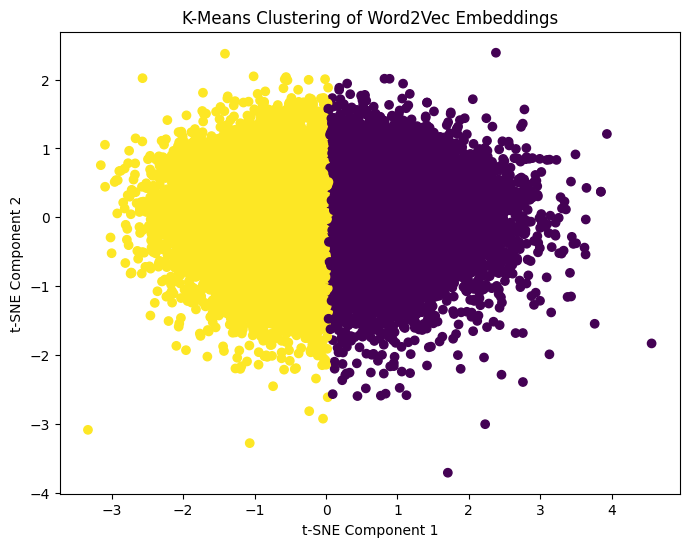

In [28]:
# prompt: Create cluster from embedding_word2vec column and use sciket-learn libary and apply the k-mean algoirithm. Finally visualize the result.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the embeddings as a numpy array
embeddings = np.vstack(df['embedding_word2vec'].values)

# Apply K-Means clustering (choose the number of clusters you want)
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)

# Visualize the clusters using the reduced embeddings
plt.figure(figsize=(8, 6))
plt.scatter(df['embedding_word2vec_pca_x'], df['embedding_word2vec_pca_y'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Word2Vec Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


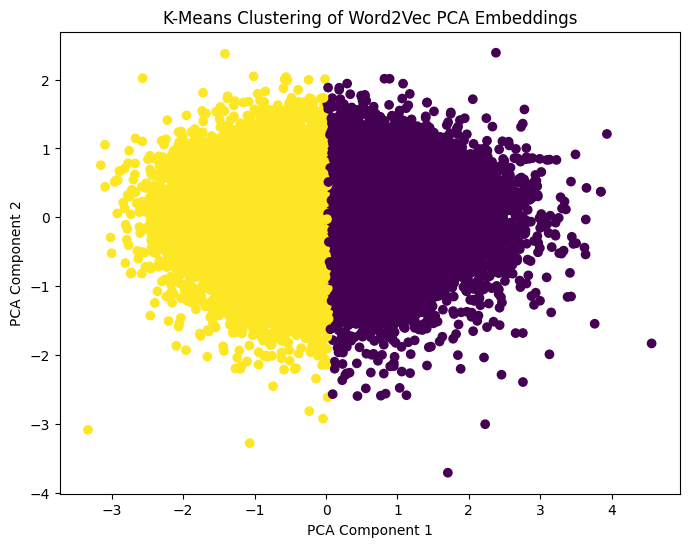

In [26]:
# prompt: # prompt: Create cluster from embedding_word2vec pca values and use sciket-learn libary and apply the k-mean algoirithm. Finally visualize the result.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the PCA embeddings for 'embedding_word2vec'
pca_embeddings = df[['embedding_word2vec_pca_x', 'embedding_word2vec_pca_y']].values

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # You can change the number of clusters
df['cluster_label_pca'] = kmeans.fit_predict(pca_embeddings)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['embedding_word2vec_pca_x'], df['embedding_word2vec_pca_y'], c=df['cluster_label_pca'], cmap='viridis')
plt.title('K-Means Clustering of Word2Vec PCA Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [30]:
# prompt: Measure the accuracy between the true label and the clusterd labels.

from sklearn.metrics import accuracy_score

# Assuming 'label' is the column with true labels and 'cluster_label_pca'
# is the column with clustered labels
accuracy = accuracy_score(df['label'], df['cluster'])
print(f"Accuracy Cluster: {accuracy}")

accuracy = accuracy_score(df['label'], df['cluster_label_pca'])
print(f"Accuracy Cluster with PCA: {accuracy}")

Accuracy Cluster: 0.5960277777777778
Accuracy Cluster with PCA: 0.5968333333333333
